# Feature Selection

Feature selection is the process of choosing the most relevant features (columns) for your machine learning model. It helps to:

- Improve model performance

- Reduce overfitting

- Speed up training time

- Make models more interpretable

**Feature Selection Methods:**

| Type         | Examples                                    | Description                                    |
| ------------ | ------------------------------------------- | ---------------------------------------------- |
| **Filter**   | Correlation, Chi-square, Mutual Information | Fast, statistical methods independent of model |
| **Wrapper**  | RFE, Forward/Backward Selection             | Use model performance to evaluate subsets      |
| **Embedded** | Lasso, Tree-based Feature Importance        | Selection happens during model training        |


- **Filter:**
    - **Features Correlation** (for numerical features) : Measures the correlation between each feature and the target variable. Features with high correlation are selected.
    - **Chi-Square Test** (for categorical features) : Tests independence between feature and target variable.
    - **Mutual Information** : (for categorical features) : Measures the dependency between features and target.
    - **Cramér’s V** (Categorical-Categorical) : Strength of association
    - **Theil’s U** (Categorical-Categorical) : Predictive power

- **Wrapper:**
    - **Recursive Feature Elimination (RFE)**: Fits the model, ranks features by importance, and eliminates the least important features iteratively.
    - **Forward Selection**: Starts with no features and adds one feature at a time that improves model performance until no further improvement.
    - **Backward Elimination**: Starts with all features and removes the least significant feature iteratively until the performance starts to degrade.

- **Embedded:**
    - **Feature Importance from Decision Trees**: Models like Random Forests and Gradient Boosting Trees provide feature importance scores based on how frequently a feature is used to split the data.

- **Dimensionality Reduction Techniques**
   - **Principal Component Analysis (PCA)**: Transforms features into a set of linearly uncorrelated components ranked by the amount of variance they explain.
   - **Linear Discriminant Analysis (LDA)**: Projects features onto a lower-dimensional space while maximizing class separability.
   - **t-Distributed Stochastic Neighbor Embedding (t-SNE)**: Useful for visualizing high-dimensional data in lower dimensions, though less commonly used for feature selection.


[Blog to Refer](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)

## Imports

In [1]:
# data manulplation
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# statstical testing
from scipy import stats
import statsmodels.api as sm
import statistics as st
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

# train test split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

# metrcs
from sklearn.metrics import f1_score

# general
import os
from typing import List,  Tuple
import warnings
warnings.filterwarnings('ignore')

## Read Data

In [2]:
DATA_LEVEL_1_DIR = os.path.join("data", "heart_stroke_feature_engineered_level_1.csv")
DATA_LEVEL_2_DIR = os.path.join("data", "heart_stroke_feature_engineered_level_2.csv")
DATA_LEVEL_3_DIR = os.path.join("data", "heart_stroke_feature_engineered_level_3.csv")

df = pd.read_csv(DATA_LEVEL_1_DIR)

In [3]:
df.shape

(5110, 27)

In [4]:
df.head()

,Id,Age,Age_Power,Avg_glucose_level_Power,Bmi,Bmi_Log,Bmi_Log_10,Bmi_Exp,Bmi_Exp_2,Bmi_Power,...,Work_type_never_worked,Work_type_private,Work_type_self_employed,Residence_type_encode,Smoking_status_encode,Smoking_status_formerly_smoked,Smoking_status_never_smoked,Smoking_status_smokes,Smoking_status_unknown,Stroke
0,9046,67.0,42.663301,0.926756,36.6,3.600048,1.563481,7.855576e+15,1.041592e+11,50.730499,...,0.0,1.0,0.0,1,0,1.0,0.0,0.0,0.0,1
1,51676,61.0,39.315669,0.926379,-1.0,NaN,NaN,3.678794e-01,5.000000e-01,-0.955627,...,0.0,0.0,1.0,0,1,0.0,1.0,0.0,0.0,1
2,31112,80.0,49.780537,0.923337,32.5,3.481240,1.511883,1.301879e+14,6.074001e+09,44.477741,...,0.0,1.0,0.0,0,1,0.0,1.0,0.0,0.0,1
3,60182,49.0,32.477743,0.925784,34.4,3.538057,1.536558,8.704226e+14,2.266897e+10,47.364744,...,0.0,1.0,0.0,1,2,0.0,0.0,1.0,0.0,1
4,1665,79.0,49.239063,0.925848,24.0,3.178054,1.380211,2.648912e+10,1.677722e+07,31.814112,...,0.0,0.0,1.0,0,1,0.0,1.0,0.0,0.0,1


In [5]:
df.isna().sum()

Id                                  0
Age                                 0
Age_Power                           0
Avg_glucose_level_Power             0
Bmi                                 0
Bmi_Log                           201
Bmi_Log_10                        201
Bmi_Exp                             0
Bmi_Exp_2                           0
Bmi_Power                           0
Bmi_Squr                            0
Bmi_Cube                            0
Gender_encode                       0
Ever_married_encode                 0
Work_type_encode                    0
Work_type_children                  0
Work_type_govt_job                  0
Work_type_never_worked              0
Work_type_private                   0
Work_type_self_employed             0
Residence_type_encode               0
Smoking_status_encode               0
Smoking_status_formerly_smoked      0
Smoking_status_never_smoked         0
Smoking_status_smokes               0
Smoking_status_unknown              0
Stroke      

In [6]:
df.columns

Index(['Id', 'Age', 'Age_Power', 'Avg_glucose_level_Power', 'Bmi', 'Bmi_Log',
       'Bmi_Log_10', 'Bmi_Exp', 'Bmi_Exp_2', 'Bmi_Power', 'Bmi_Squr',
       'Bmi_Cube', 'Gender_encode', 'Ever_married_encode', 'Work_type_encode',
       'Work_type_children', 'Work_type_govt_job', 'Work_type_never_worked',
       'Work_type_private', 'Work_type_self_employed', 'Residence_type_encode',
       'Smoking_status_encode', 'Smoking_status_formerly_smoked',
       'Smoking_status_never_smoked', 'Smoking_status_smokes',
       'Smoking_status_unknown', 'Stroke'],
      dtype='object')

In [7]:
TARGET_COL = ['Stroke']
NUM_FEATURES = [ 'Age', 'Age_Power', 'Avg_glucose_level_Power', 'Bmi', 
              # 'Bmi_Log', 'Bmi_Log_10', 
              'Bmi_Exp', 'Bmi_Exp_2', 'Bmi_Power', 'Bmi_Squr', 'Bmi_Cube',]
CAT_FEATURES = ['Gender_encode', 'Ever_married_encode', 'Work_type_encode',
              'Work_type_children', 'Work_type_govt_job', 'Work_type_never_worked',
              'Work_type_private', 'Work_type_self_employed', 'Residence_type_encode',
              'Smoking_status_encode', 'Smoking_status_formerly_smoked',
              'Smoking_status_never_smoked', 'Smoking_status_smokes',
              'Smoking_status_unknown',]

# Feature Selection Methods

## 1. Filter Methods

In [8]:
from scipy import stats
import statsmodels.api as sm
import statistics as st
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

### 1.1 Correlation

In [9]:
def create_lower_triangular_mask(corr: pd.DataFrame, thresh:float = 40):
    # mask = np.triu(np.ones_like(corr, dtype=bool))
    mask = np.tril(np.ones_like(corr, dtype=bool))
    # shape of mask
    n = mask.shape[0]
    # Traverse the lower triangle
    for i in range(n):
        for j in range(i + 1):  # j goes from 0 to i (inclusive)
            val = np.abs(corr.iloc[i, j])
            if val > thresh and val < 100:
                mask[i][j] = False
    return mask

def check_correlation(df: pd.DataFrame, features: List[str], methods: List[str] = None, percent: bool = True) -> dict():
    # factor
    factor = 1
    if percent:
        factor = 100

    if methods is None:
        methods = ["pearson", "kendall", "spearman"]

    # calculating correlation
    corr = {}
    for method in methods:
        # round offing the correlation to 3 decimal places
        df_corr = np.round(df[features].corr(method=method) * factor, 3) # this counts fractional error
        corr[method] = df_corr

    return corr

def plot_correlation(corr_dict: dict(), width:int=15, height:int=4, thresh:float = 40) -> None:
    # collect no of methods
    no_of_methods = list(corr_dict.keys())
    # collect total columns
    list_of_columns = list(corr_dict[no_of_methods[0]].columns)

    # decide we have to plot horizontally or vertically
    if len(list_of_columns) > 5: 
        # go vertical 
        fig, axes = plt.subplots(len(no_of_methods), 1, figsize=(height, width))

        # plotting all the methods
        for row_idx, method_name in enumerate(no_of_methods):
            # generate mask based on threshold
            mask = create_lower_triangular_mask(corr_dict[method_name], thresh)
            sns.heatmap(corr_dict[method_name], annot=True,
                        square=True, # square in plot
                        cmap='coolwarm', # color system
                        cbar_kws={"shrink": .8},
                        mask=mask, # hididng upper tiangular 
                        annot_kws={"size": 10, "color": "black"},  # Customize font size and color
                        ax=axes[row_idx])

            axes[row_idx].set_title(f"{method_name} Correlation (%) | Min threshold: {thresh}")

        plt.tight_layout()
        plt.show()        

    else: 
        # go horizontal
        fig, axes = plt.subplots(1, len(no_of_methods), figsize=(width, height))

        # plotting all the methods
        for col_idx, method_name in enumerate(no_of_methods):
            # generate mask based on threshold
            mask = create_lower_triangular_mask(corr_dict[method_name], thresh)
            sns.heatmap(corr_dict[method_name], annot=True, 
                        square=True, # square in plot
                        cmap='coolwarm', # color system
                        cbar_kws={"shrink": .8},
                        mask=mask, # hididng upper tiangular 
                        annot_kws={"size": 10, "color": "black"},  # Customize font size and color
                        ax=axes[col_idx])
            axes[col_idx].set_title(f"{method_name} Correlation (%)| Min threshold: {thresh}")

        plt.tight_layout()
        plt.show()    

In [10]:
# check for correlation w.r.t target
h = check_correlation(df, NUM_FEATURES+TARGET_COL)

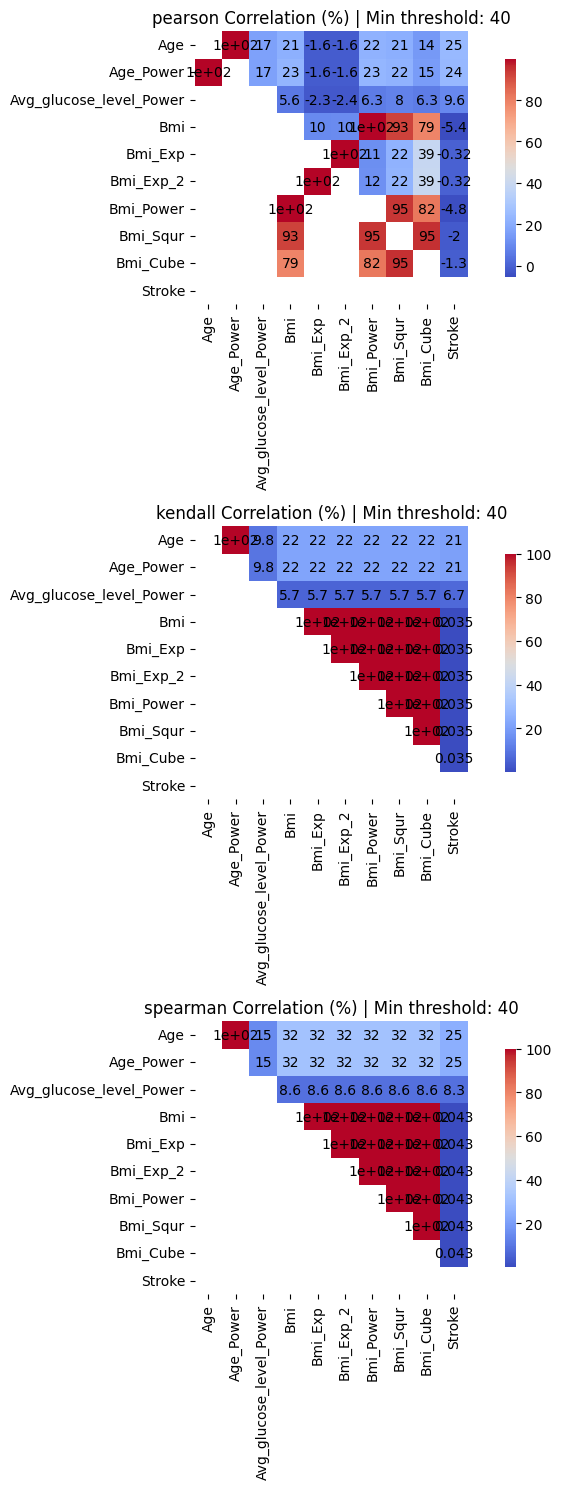

In [11]:
v = check_correlation(df, NUM_FEATURES+TARGET_COL)
# vertical plot
plot_correlation(v, 15, 8)

- no such correlation found

### 1.2 Statistical Tests

#### Normality Check

In [12]:
# normality check
def check_normality(data):
    """ 
    hypothesis test for normality check in continuous variable
    """
    stat, p_value = stats.shapiro(data)
    h_0 = "H0: data normally distributed"
    h_1 = "H1: data not normally distributed"
    result = ""
    if p_value < 0.05:
        result = "Reject null hypothesis"
    else:
        result = "Fail to reject null hypothesis"

    return {"h0":h_0, "h1":h_1,"p_val":p_value, "cc":result}

#### T-test: two smaple

In [13]:
# z-test - 2 category
def t_test_of_independence(df, x_col, y_col):
    """
    A t-test is a statistical test used to determine if there is a significant difference between 
    the means of two groups. It is commonly used when comparing the means of a numerical variable
    (dependent variable) across two categorical groups (independent variable).
    """
    h_0=f"H0: no differnce in mean's"
    h_1=f"H1: difference in mean's"
    categories = df[y_col].unique()
    # Separate numeric values by category
    group_A = df[df[y_col] == categories[0]][x_col]
    group_B = df[df[y_col] == categories[1]][x_col]

    # Perform independent t-test assuming equal variances
    t_stat, p_value = stats.ttest_ind(group_A, group_B)
    result = ""
    if np.round(p_value, 2) < 0.05:
        result = "Reject null hypothesis"
    else:
        result = "Fail to reject null hypothesis"
    return {"h0":h_0, "h1":h_1,"p_val":p_value, "cc":result}

#### Mann whitney U test

In [14]:
from scipy.stats import mannwhitneyu

# mann whitney u test
def mannwhitneyu_test(df, x_col, y_col):
    """
    A t-test is a statistical test used to determine if there is a significant difference between 
    the means of two groups. It is commonly used when comparing the means of a numerical variable
    (dependent variable) across two categorical groups (independent variable).
    """
    h_0=f"H0: no differnce in mean's"
    h_1=f"H1: difference in mean's"
    categories = df[y_col].unique()
    # Separate numeric values by category
    group_A = df[df[y_col] == categories[0]][x_col]
    group_B = df[df[y_col] == categories[1]][x_col]

    # Perform independent t-test assuming equal variances
    u_stat, p_value = stats.mannwhitneyu(group_A, group_B, alternative='two-sided')

    result = ""
    if np.round(p_value, 2) < 0.05:
        result = "Reject null hypothesis"
    else:
        result = "Fail to reject null hypothesis"
    return {"h0":h_0, "h1":h_1,"p_val":p_value, "cc":result}

#### Chi-square test

In [15]:
# chi square goodness of fit test
def chisquare_test(df, col):
    """
    we compare the observed frequencies of categories within that variable 
    to the expected frequencies under a specified distribution or hypothesis
    """
    h_0="H0: observed == expected"
    h_1="H1: observed != expected"
    observed = np.array(df[col].value_counts())
    total_observed = np.sum(observed)
    expected = np.array([total_observed/df[col].nunique()] * df[col].nunique())
    # Perform chi-square goodness-of-fit test
    chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
    result = ""
    if np.round(p_value, 2) < 0.05:
        result = "Reject null hypothesis"
    else:
        result = "Fail to reject null hypothesis"
    return {"h0":h_0, "h1":h_1,"p_val":p_value, "cc":result}

#### Chi-square test of independence

In [16]:
# chi squre test of independence
def chisquare_independence_test(df, x_col, y_col):
    """
    To determine if there is a significant association or relationship between two categorical variables.
    """
    h_0=f"H0: no relation btween {x_col} & {y_col}" # both are independent
    h_1=f"H1: relation btween {x_col} & {y_col}" # there is a dependency
    contingency_table = pd.crosstab(df[x_col], df[y_col])
    # Perform Chi-square test of independence
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    result = ""
    if np.round(p_value, 2) < 0.05:
        result = "Reject null hypothesis"
    else:
        result = "Fail to reject null hypothesis"
    return {"h0":h_0, "h1":h_1,"p_val":p_value, "cc":result}

#### Anova test

In [17]:
def ANOVA(df, x_col, y_col):
    """
    A f-test is a statistical test used to determine if there is a significant difference between 
    the means of more than two groups. It is commonly used when comparing the means of a numerical variable
    (dependent variable) across more than two categorical groups (independent variable).
    """
    h_0=f"H0: no differnce in mean's"
    h_1=f"H1: difference in mean's"

    # Fit the model
    model = ols(f'{y_col} ~ C({x_col})', data=df).fit()
    
    # Perform ANOVA
    anova_table = anova_lm(model, typ=2)
    
    # Extract p-value for the categorical variable
    p_value = anova_table['PR(>F)'][0]

    result = ""
    if np.round(p_value, 2) < 0.05:
        result = "Reject null hypothesis"
    else:
        result = "Fail to reject null hypothesis"
    return {"h0":h_0, "h1":h_1,"p_val":p_value, "cc":result}

In [18]:
# possible statstical method to filter all combination of feature and target
def statistical_filtering(df:pd.DataFrame, num_features:List[str], cat_features:List[str], target:str):
    """
    this function will filter numerical and categorical variables
    based on statstical test score if there is a significance 
    """
    # blank report 
    report_df = pd.DataFrame()

    # numrical features: int -> cat | float -> cat
    feature_names = []
    feature_type = []
    distribution_status = []
    test_performed = []
    pval = []
    is_selected = []
    for num_feature in num_features:
        DIST_STATUS = "Not Normal"
        TEST_PERFORMED = "None"
        # check normality
        norm_result = check_normality(df[num_feature].values)
        if norm_result["p_val"] < 0.05:
            DIST_STATUS = "Normal"
            # parametric
            test_results = t_test_of_independence(df, num_feature, target)
            TEST_PERFORMED = "t-test:2 sample"
        else:
            # non parametricsss
            test_results = mannwhitneyu_test(df, num_feature, target)
            TEST_PERFORMED = "mannwhitney"
        # collecting results
        feature_names.append(num_feature)
        feature_type.append("numerical")
        distribution_status.append(DIST_STATUS)
        test_performed.append(TEST_PERFORMED)
        pval.append(test_results["p_val"])
        if test_results["p_val"] < 0.05:
            is_selected.append("Yes")
        else:
            is_selected.append("No")

    # categorical features: binary -> cat | ordinal -> cat | nominal -> cat
    for cat_feature in cat_features:
        unique = df[cat_feature].nunique()
        DIST_STATUS = "Not Uniform"
        # TEST_PERFORMED = "None"

        # check uniformity
        uniform_result = chisquare_test(df, cat_feature)
        if uniform_result["p_val"] < 0.05:
            DIST_STATUS = "Uniform"
        TEST_PERFORMED = "None"
        if unique > 2:
            test_results = ANOVA(df, cat_feature, target)
            TEST_PERFORMED = "Anova test"
        else:
            test_results = chisquare_independence_test(df, cat_feature, target)
            TEST_PERFORMED = "Chi2 Test"
        # collecting results
        feature_names.append(cat_feature)
        feature_type.append("categorical")
        distribution_status.append(DIST_STATUS)
        test_performed.append(TEST_PERFORMED)
        pval.append(test_results["p_val"])
        if test_results["p_val"] < 0.05:
            is_selected.append("Yes")
        else:
            is_selected.append("No")
    # add to report
    report_df["Feature"] = feature_names
    report_df["Type"] = feature_type
    report_df["Distrbution"] = distribution_status
    report_df["Test Performed"] = test_performed
    report_df["P Value"] = pval
    report_df["Is Selected?"] = is_selected

    return report_df

In [19]:
statistically_selected = statistical_filtering(df, NUM_FEATURES, CAT_FEATURES, TARGET_COL[0])
statistically_selected

,Feature,Type,Distrbution,Test Performed,P Value,Is Selected?
0,Age,numerical,Normal,t-test:2 sample,7.030778e-71,Yes
1,Age_Power,numerical,Normal,t-test:2 sample,4.251048e-67,Yes
2,Avg_glucose_level_Power,numerical,Normal,t-test:2 sample,5.748262e-12,Yes
3,Bmi,numerical,Normal,t-test:2 sample,1.119524e-04,Yes
4,Bmi_Exp,numerical,Not Normal,mannwhitney,9.755622e-01,No
5,Bmi_Exp_2,numerical,Normal,t-test:2 sample,8.173829e-01,No
6,Bmi_Power,numerical,Normal,t-test:2 sample,6.707711e-04,Yes
7,Bmi_Squr,numerical,Normal,t-test:2 sample,1.567731e-01,No
8,Bmi_Cube,numerical,Normal,t-test:2 sample,3.711391e-01,No
9,Gender_encode,categorical,Uniform,Anova test,7.896500e-01,No


In [20]:
statistically_selected[statistically_selected["Is Selected?"] == 'Yes']['Feature'].to_list()

['Age',
 'Age_Power',
 'Avg_glucose_level_Power',
 'Bmi',
 'Bmi_Power',
 'Ever_married_encode',
 'Work_type_encode',
 'Work_type_children',
 'Work_type_self_employed',
 'Smoking_status_encode',
 'Smoking_status_formerly_smoked',
 'Smoking_status_unknown']

### 1.3 Mutual Information

## 2. Wrapper Methods

In [21]:
df[NUM_FEATURES+CAT_FEATURES].columns

Index(['Age', 'Age_Power', 'Avg_glucose_level_Power', 'Bmi', 'Bmi_Exp',
       'Bmi_Exp_2', 'Bmi_Power', 'Bmi_Squr', 'Bmi_Cube', 'Gender_encode',
       'Ever_married_encode', 'Work_type_encode', 'Work_type_children',
       'Work_type_govt_job', 'Work_type_never_worked', 'Work_type_private',
       'Work_type_self_employed', 'Residence_type_encode',
       'Smoking_status_encode', 'Smoking_status_formerly_smoked',
       'Smoking_status_never_smoked', 'Smoking_status_smokes',
       'Smoking_status_unknown'],
      dtype='object')

In [22]:
features = df[NUM_FEATURES+CAT_FEATURES].columns
X = df[features].values
y = df[TARGET_COL].iloc[:, 0].values

In [80]:
# linear model
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
# Byes model
from sklearn.naive_bayes import GaussianNB
# support vector machine
from sklearn.svm import SVC
# distance based model
from sklearn.neighbors import KNeighborsClassifier
# tree based
from sklearn.tree import DecisionTreeClassifier
# bagging special case
from sklearn.ensemble import RandomForestClassifier
# ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

In [81]:
class Wrapper_Methods:

    def __init__(self, df:pd.DataFrame, features:List[str], target:List[str], scoring:str, cv:int, seed:int, shuffle:bool):
        self.df = df
        self.features = features
        self.target = target
        self.scoring = scoring
        self.cv = cv
        self.seed = seed
        self.shuffle = shuffle
        self.X, self.y = self.load_data()
        self.model_tags = ["LR", "RDG", "NB", "SVM", "KNN", "DT", "RF", "SGD", "GB", "AB", "ETC", "XGB", "XGRFB", "LGB", "CB"]

    def load_data(self):
        """
        Extracts feature matrix X and target vector y from the DataFrame.

        Returns:
            tuple:
                X (ndarray): 2D NumPy array containing feature values.
                y (ndarray): 1D NumPy array containing target values.

        Raises:
            Exception: Propagates any exception that occurs during extraction.
        """
        try:
            X = self.df[self.features].values
            y = self.df[self.target].iloc[:,0].values
            return X, y
        except Exception as e:
            raise e

    def get_model(self, model_tag):
        """
        Returns a machine learning classifier based on the given model tag.

        Args:
            model_tag (str): A short code representing the type of model to return.
                            Accepted tags include:
                            - "LR"     : Logistic Regression
                            - "RDG"    : Ridge Classifier
                            - "SGD"    : Stochastic Gradient Descent Classifier
                            - "NB"     : Naive Bayes
                            - "SVM"    : Support Vector Machine
                            - "KNN"    : K-Nearest Neighbors
                            - "DT"     : Decision Tree
                            - "RF"     : Random Forest
                            - "GB"     : Gradient Boosting
                            - "AB"     : AdaBoost
                            - "ETC"    : Extra Trees Classifier
                            - "XGB"    : XGBoost Classifier
                            - "XGRFB"  : XGBoost Random Forest
                            - "LGB"    : LightGBM Classifier
                            - "CB"     : CatBoost Classifier

        Returns:
            dict: A dictionary with the model tag as the key and a tuple of
                (model name, model instance) as the value.
        
        Raises:
            Exception: If an error occurs during model creation or if the model tag is invalid.
        """
        try:
            if model_tag == "LR":
                return {"LR": ("Logistic Regression", LogisticRegression(solver="liblinear" ,max_iter=2000))}
            
            if model_tag == "RDG":
                return {"RDG": {"Ridge Classifier", RidgeClassifier()}}
            
            if model_tag == "SGD":
                return {"SGD": ("Stocastic Gradient", SGDClassifier())}
            
            if model_tag == "NB":        
                return {"NB": ("Naive Bayes", GaussianNB())}

            if model_tag == "SVM":        
                return {"SVM": ("Support Vector", SVC(kernel='linear'))} # this kernel works with RFE

            if model_tag == "KNN":         
                return {"KNN": ("K-Neighbors", KNeighborsClassifier(n_neighbors=2))}

            if model_tag == "DT":        
                return {"DT": ("Decision Tree", DecisionTreeClassifier())}

            if model_tag == "RF":        
                return {"RF": ("Random Forest", RandomForestClassifier())}

            if model_tag == "GB":        
                return {"GB": ("Gradient Boosting", GradientBoostingClassifier())}

            if model_tag == "AB":        
                return {"AB": ("Ada Boosting", AdaBoostClassifier())}

            if model_tag == "ETC":        
                return {"ETC": ("Extra Tres Boosting", ExtraTreesClassifier())}

            if model_tag == "XGB":        
                return {"XGB": ("Extra Gradient Boosting", XGBClassifier())}

            if model_tag == "XGRFB":        
                return {"XGRFB": ("Extra Random Forest Boosting", XGBRFClassifier())}

            if model_tag == "LGB":        
                return {"LGB": ("Light Boosting",LGBMClassifier(learning_rate=0.01, n_estimators=1000))}

            if model_tag == "CB":        
                return {"CB": ("Cat Boosting", CatBoostClassifier(verbose=0))}

        except Exception as e:
            raise e
    
    def evaluate_model(self, model, n_features: List[int]) -> List[float]:
        """
        Evaluates the given model using cross-validation on the selected features.

        Args:
            model: A scikit-learn compatible model object (must implement fit/predict).
            n_features (List[int]): List of feature indices to include in the evaluation.

        Returns:
            List[float]: Cross-validation scores for each fold.

        Raises:
            ValueError: If input dimensions are invalid or incompatible.
            Exception: If model training or scoring fails during cross-validation.
        """
        try:
            # define the model evaluation procedure
            cv = StratifiedKFold(n_splits=self.cv, random_state=self.seed, shuffle=self.shuffle)

            # evaluate the model: n-jobs=-1 [uses all cores]
            scores = cross_val_score(model, self.X[:, n_features], self.y, scoring=self.scoring, cv=cv, n_jobs=-1)

            return scores
        except Exception as e:
            raise e

    def get_custome_scores(self, scores: List[float]) -> Tuple[float, float]:
        """
        Calculate the mean and standard deviation of a list of scores.

        Parameters:
            scores (List[float]): A list of numerical scores.

        Returns:
            Tuple[float, float]: A tuple containing the mean and standard deviation of the scores.

        Raises:
            ValueError: If the input list is empty or contains invalid values.
        """
        try:
            # if not scores:
            #     raise ValueError("Input list 'scores' is empty.")

            mean_score = np.mean(scores)
            std_score = np.std(scores)

            return mean_score, std_score

        except Exception as e:
            print(f"Error in get_custome_scores: {e}")
            raise

    def box_plot(self, names: List[str], results: List[List[float]]) -> None:
        """
        Plots a box plot to compare model performance across different feature combinations.

        Args:
            names (List[str]): List of model or feature combination names (used as x-axis labels).
            results (List[List[float]]): A list of score lists, where each sublist contains
                                        cross-validation scores for a model or feature set.

        Returns:
            None

        Raises:
            ValueError: If the input lengths of `names` and `results` do not match.
            Exception: For any unexpected errors during plotting.
        """
        try:
            if len(names) != len(results):
                raise ValueError("Length of 'names' must match the number of result sets.")

            plt.boxplot(results, labels=names, showmeans=True)
            plt.xlabel("Models")
            plt.ylabel(f"Score: {self.scoring}")
            plt.title("Performance of Models")
            plt.grid()
            plt.show()

        except Exception as e:
            print(f"An error occurred while plotting the box plot: {e}")
            raise


    def directional_feature_selection(self, model_tags:List[str], print_status:bool, direction: str = "forward"):
        """ 
        Objective: this works on subset of features and there influence over evaluation metric, that will get us to max score
        by forwardly or backwardly eliminating the features from superset

        Remainder: this technique works with parametric and non-parametric models, does not rely on feature importance or 
        models coefficients to determin the feature selection

        Parameters:

        model_tags (List[str]): abbrivateions of model 

        print_status (bool): print model training status

        direction (str): feature selection direction , default is "forward"
                            "forward"  : subset -> superset
                            "backward" : superset -> subset

        Returns:

        model_report (dict): models performance on each subset of features
        """
        # run model evaluation for all sub set of features
        model_report = dict()
        features_list = []
        mean_scores = []
        std_scores = []
        model_names = []
        all_scores = []

        # testing all features
        for model_tag in model_tags:

            # get model 
            model_name, model = self.get_model(model_tag)[model_tag]
            print('='*15,model_name,'='*15)
            # forward features selection
            selection_obj = SequentialFeatureSelector(
                estimator=model,             # try on this model
                n_features_to_select="auto", # select automatically,
                tol = None,                  # score threshould
                direction=direction,         # direction of feature selection
                scoring=self.scoring,        # evaluation metric
                cv=self.cv,                  # cross validation method
                n_jobs=-1,                   # use all cores
            )
            selection_obj.fit(X, y)

            # evaluating for score on selected features
            s = self.evaluate_model( model, selection_obj.get_support(indices=True))

            # print(f"Score: {s}")

            # collecting all scores
            all_scores.append(s)
            # mean scores
            mean, std = self.get_custome_scores(s)
            
            selected_features = selection_obj.get_feature_names_out(self.features)

            # print those scores
            if print_status:
                # print('='*15,model_name,'='*15)
                msg = f"{len(selected_features)} : Mean: {mean} Std: {std}\n"
                print(msg)
            
            features_list.append(selected_features)
            mean_scores.append(mean)
            std_scores.append(std)
            model_names.append(model_name) 

        # collecting all scores
        model_report["model_name"] = model_names
        model_report[f"mean_{self.scoring}"] = mean_scores
        model_report[f"std_{self.scoring}"] = std_scores
        model_report["selected_features"] = features_list
        model_report["cv_scores"] = all_scores

        # plotting results
        self.box_plot(model_tags, all_scores)

        return model_report

    def recursive_feature_elimination(self, model_tags:List[str], print_status:bool):
        """ 
        Objective: this function provieds subset of features by starting with all features at once eliminates one 
        feature at a time if score deteriorates, based of feature importance or coeefiecient associated with the feature

        Remainder: this technique works ONLY with parametric models, cause it highly dependent on `feature importance`
        and `co-efficient` associated with features as well of evaluation score

        Parameters:

        model_tags (List[str]): abbrivateions of parametric model

        print_status (bool): print model training status

        Returns:

        model_report (dict): models performance on each subset of features
        """

        # run model evaluation for all sub set of features
        model_report = dict()
        features_list = []
        mean_scores = []
        std_scores = []
        model_names = []
        all_scores = []

        # testing all features
        for model_tag in model_tags:

            # get model 
            model_name, model = self.get_model(model_tag)[model_tag]
            print('='*15,model_name,'='*15)
            rf_eliminate_cv = RFECV(
                estimator=model,
                step=1,
                cv=self.cv,
                scoring=self.scoring,
                min_features_to_select=1,
                n_jobs=-1,
            )
            rf_eliminate_cv.fit(X, y)

            # evaluating for score on selected features
            s = self.evaluate_model(model, rf_eliminate_cv.get_support(indices=True))

            # collecting all scores
            all_scores.append(s)
            # mean scores
            mean, std = self.get_custome_scores(s)
            
            # selected features
            selected_features = rf_eliminate_cv.get_feature_names_out(self.features)

            # print those scores
            if print_status:
                msg = f"{len(selected_features)} : Mean: {mean} Std: {std}\n"
                print(msg)
            
            features_list.append(selected_features)
            mean_scores.append(mean)
            std_scores.append(std)
            model_names.append(model_name)

        # collecting all scores
        model_report["model_name"] = model_names
        model_report[f"mean_{self.scoring}"] = mean_scores
        model_report[f"std_{self.scoring}"] = std_scores
        model_report["selected_features"] = features_list
        model_report["cv_scores"] = all_scores

        # plotting results
        self.box_plot(model_tags, all_scores)

        return model_report

In [83]:
df.columns

Index(['Id', 'Age', 'Age_Power', 'Avg_glucose_level_Power', 'Bmi', 'Bmi_Log',
       'Bmi_Log_10', 'Bmi_Exp', 'Bmi_Exp_2', 'Bmi_Power', 'Bmi_Squr',
       'Bmi_Cube', 'Gender_encode', 'Ever_married_encode', 'Work_type_encode',
       'Work_type_children', 'Work_type_govt_job', 'Work_type_never_worked',
       'Work_type_private', 'Work_type_self_employed', 'Residence_type_encode',
       'Smoking_status_encode', 'Smoking_status_formerly_smoked',
       'Smoking_status_never_smoked', 'Smoking_status_smokes',
       'Smoking_status_unknown', 'Stroke'],
      dtype='object')

In [84]:
# parameters
DATA = df.drop(['Id', 'Bmi_Log', 'Bmi_Log_10'], axis=1).copy()
# TARGET_COL = TARGET_COL[0]
FEATURES = [i for i in DATA.columns if i not in TARGET_COL]
SCORING = "f1"
CV = 5
SEED = 0
SHUFFLE = True

In [85]:
wrapper_obj = Wrapper_Methods(
    DATA,
    FEATURES,
    TARGET_COL,
    SCORING,
    CV,
    SEED,
    SHUFFLE
)

In [86]:
# models work with forward selection approach
model_tags = ["LR", "NB", "SVM", "KNN", "DT", "RF", "GB", "AB", "ETC", "XGB", "XGRFB","CB"]

### 2.1 RFE

=============== Logistic Regression ===============
1 : Mean: 0.0 Std: 0.0



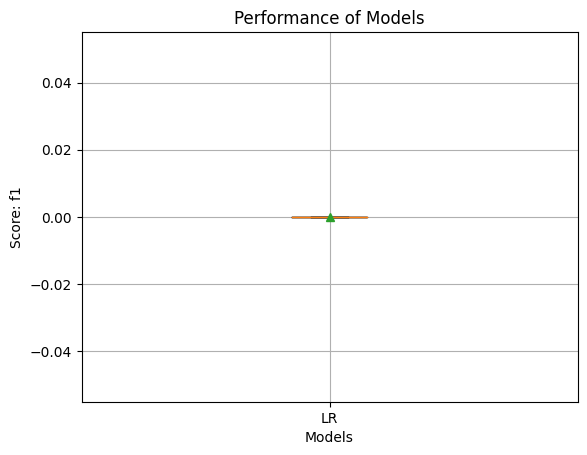

In [87]:
rfe_LR_model_report = wrapper_obj.recursive_feature_elimination(["LR"], True)

In [ ]:
pd.DataFrame(rfe_model_report).sort_values(by="mean_f1", ascending=False)

### 2.2 Forward Feature Selection

In [89]:
model_tags

['LR', 'NB', 'SVM', 'KNN', 'DT', 'RF', 'GB', 'AB', 'ETC', 'XGB', 'XGRFB', 'CB']

In [92]:
forward_DT_model_report = wrapper_obj.directional_feature_selection(["DT"], True, "forward")

=============== Decision Tree ===============


/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/_array_api.py:380: RuntimeWarning: overflow encountered in cast
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/_array_api.py:380: RuntimeWarning: overflow encountered in cast
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/_array_api.py:380: RuntimeWarning: overflow encountered in cast
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/_array_api.py:380: RuntimeWarning: overflow encountered in cast
  array = numpy.asarray(array, or

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 959, in fit
    super()._fit(
  File "/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 247, in _fit
    self._compute_missing_values_in_feature_mask(X)
  File "/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 212, in _compute_missing_values_in_feature_mask
    _assert_all_finite_element_wise(X, xp=np, allow_nan=True, **common_kwargs)
  File "/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/heart-stroke-prediction/venv/lib/python3.8/site-packages/sklearn/utils/validation.py", line 171, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains infinity or a value too large for dtype('float32').


In [ ]:
pd.DataFrame(forward_model_report).sort_values(by="mean_f1", ascending=False)

### 2.3 Backward Feature Elimination

In [ ]:
backward_model_report = wrapper_obj.directional_feature_selection(model_tags, True, "backward")

In [ ]:
pd.DataFrame(backward_model_report).sort_values(by="mean_f1", ascending=False)

## 3. Embedded Methods

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importance(importances, feature_names, title="Feature Importances", top_n=None):
    """
    Plots a bar chart of feature importances.

    Args:
        importances (array-like): Array of importance scores or coefficients.
        feature_names (list): Corresponding feature names.
        title (str): Plot title.
        top_n (int or None): Number of top features to plot. If None, plot all.
    """
    importances = np.array(importances)
    feature_names = np.array(feature_names)

    # Filter top N if needed
    if top_n is not None:
        indices = np.argsort(importances)[-top_n:][::-1]
    else:
        indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), feature_names[indices])
    plt.gca().invert_yaxis()
    plt.xlabel("Importance")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [67]:
X, y = wrapper_obj.load_data()

### 3.1 Decision Tree

In [68]:
# Train a Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X, y)

ValueError: Input X contains infinity or a value too large for dtype('float32').

In [ ]:
# Plot feature importances
plot_feature_importance(
    importances=dt.feature_importances_,
    feature_names=feature_names,
    title="Decision Tree Feature Importances"
)

### 3.2 Random Forest

In [ ]:
# Train random forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)

In [ ]:
# Plot feature importances
plot_feature_importance(
    importances=rf.feature_importances_,
    feature_names=feature_names,
    title="Decision Tree Feature Importances"
)

## 4. Dimenssion Reduction Methods

- **PCA:** Linear method that captures the most variance.
- **LDA:** Supervised method that maximizes class separability.
- **t-SNE:** Non-linear method useful for visualization.

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import Isomap